In [62]:
import pandas as pd
import numpy as np

In [63]:
t_data=pd.read_csv('./sentiment_tweets3.csv')
t_data.head(5)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [64]:
t_data.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [65]:
#Check any null values present or not 
t_data.duplicated().sum()

0

In [66]:
t_data.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [67]:
print(f"misssing value check{t_data.isnull().sum()}")

misssing value checkIndex                        0
message to examine           0
label (depression result)    0
dtype: int64


In [68]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


<Axes: xlabel='label (depression result)'>

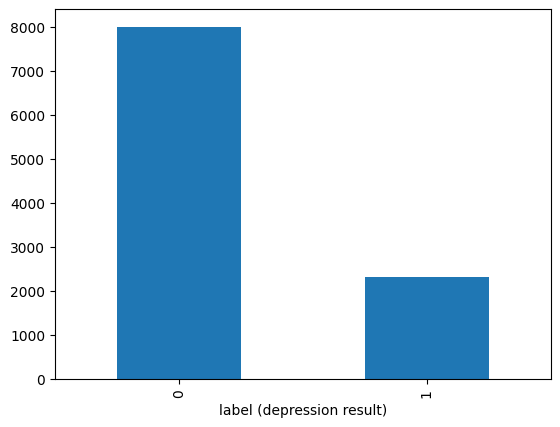

In [69]:
t_data['label (depression result)'].value_counts().plot(kind='bar')

In [70]:
#add matplot libiray
import matplotlib.pyplot as plt 
#NLP 
#if dont have nltk please do install
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
import re

#Warnings
import warnings

warnings.filterwarnings('ignore')


#### Cleaning Step: Removing Stopwords

Stopwords are common words (e.g., "the," "and," "in") that are often removed in NLP because they:

1.Add little semantic value.</br>
2.Increase dimensionality.</br>
3.Consume unnecessary resources.</br>
4.Dilute the importance of meaningful words.</br>
5.Improve interpretability and focus on content.</br>
Semantics: Semantics refers to the meaning of words, phrases, or sentences in a language. In NLP, understanding and analyzing semantics are essential for tasks like sentiment analysis and machine translation.</br>

Word Cloud: A word cloud is a visual representation of text data, where words are displayed in varying sizes based on their frequency in the text. It provides a quick overview of key terms.

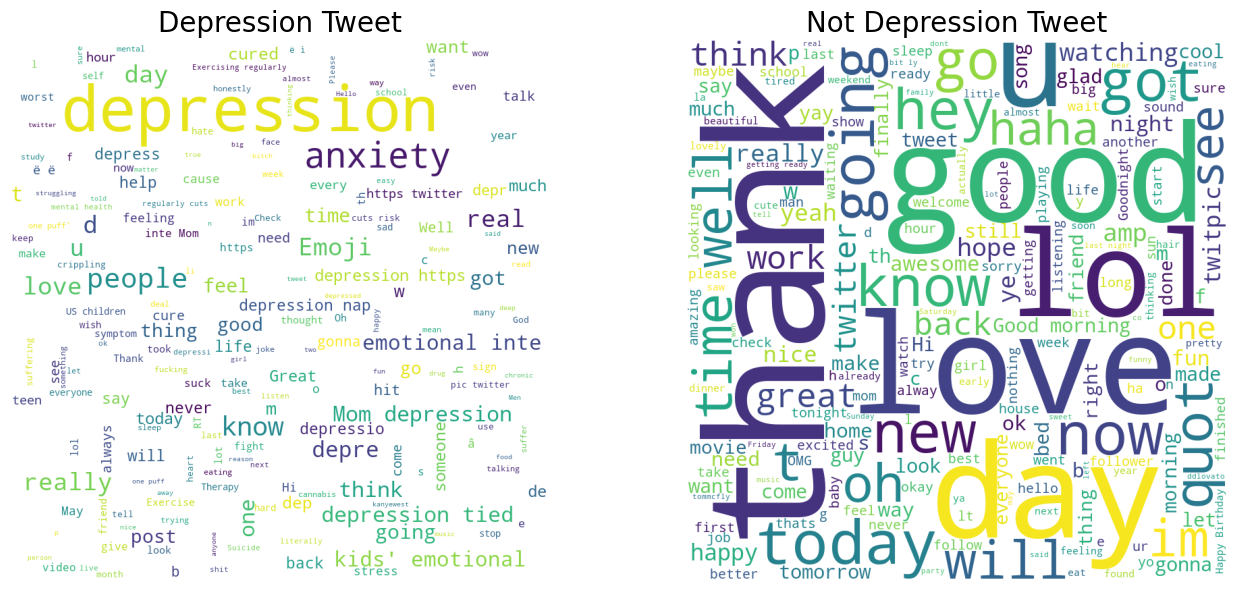

In [71]:
#plotting wordclouds  for both +ve and -ve tweets
stopwords=set(STOPWORDS)
#removing 'user' word it doesnt hold any context in our context
stopwords.add('user')

# To separate the depression tweet form out dataset
depression_tweet=t_data['message to examine'][t_data['label (depression result)']==1].to_string()
# To get the not depression tweets
not_depression=t_data['message to examine'][t_data['label (depression result)']==0].to_string()

# To draw wordcloud for both depression and not_depression
wordcloud_depression=WordCloud(height=800,width=800,
                               background_color='white',stopwords=stopwords,
                               min_font_size=10).generate(depression_tweet)
wordcloud_not_depression=WordCloud(height=800,width=800,
                                   background_color='white',stopwords=stopwords,
                                   min_font_size=10).generate(not_depression)

#above we have set the  height and width of the both word cloud.below here we created visual representation of
# both type tweets
plt.figure(figsize=(14,6),facecolor=None)
plt.subplot(1,2,1)
plt.imshow(wordcloud_depression)
plt.axis('off')
plt.title('Depression Tweet',fontdict={'fontsize':20})

plt.subplot(1,2,2)
plt.imshow(wordcloud_not_depression)
plt.axis('off')
plt.title('Not Depression Tweet',fontdict={'fontsize':20})

plt.tight_layout()
plt.show()


### Cleaning Step: Converting to Lowercase

Uniformity: Converting text to lowercase ensures uniformity in the dataset, as it treats uppercase and lowercase versions of the same word as identical. This avoids potential issues related to case sensitivity.

Stopword Matching: When removing stopwords (common words like "the" or "and"), converting to lowercase ensures that stopwords are correctly identified and removed, regardless of their original case.

Consistency in Analysis: For text analysis tasks like text classification, sentiment analysis, or word frequency analysis, converting to lowercase ensures that words are treated consistently, regardless of how they appear in the text.

Matching Keywords: In keyword matching tasks, such as information retrieval or searching, converting both the search query and the text data to lowercase ensures that matches are not missed due to case differences.

Reduction of Vocabulary Size: Converting to lowercase helps reduce the vocabulary size, making it easier to manage and analyze text data, as different cases of the same word are considered the same.



In [72]:
t_data['cleaned_message']=t_data['message to examine'].str.lower()
t_data.head()

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder


In [73]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karuppasamy.v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

def remove_stopword(text):
    words=[words.lower() for words in text.split() if words not in stop_words]
    return " ".join(words)

t_data['cleaned_message']=t_data['cleaned_message'].apply(remove_stopword)


In [75]:
t_data.head(5)

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!! myspace.com/lookthunder


#### Cleaning Step: Removing URLs using Regular Expressions (RegEx)

Removing URLs can be crucial for text analysis as they often don't provide meaningful information and can introduce noise. This step is important in tasks like sentiment analysis, where the sentiment of a tweet or review is more relevant than the URLs within it.

In [76]:
#clean URL


def clean_url(text):
    data=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_|+.~#?&\/\/=]*)",' ',text)                                                                                          
    #data=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',data)
    return re.sub(r'/',' / ',data)
    #return re.sub(r'/', ' / ', data)
t_data['cleaned_message']=t_data['cleaned_message'].apply(lambda x:clean_url(x))
t_data.head(5)

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!!


**Cleaning Step: Cleaning Punctuations** 

- **Explanation**:

Punctuation marks (such as ".", ",", "?", "!" and more) serve to provide structure and meaning to sentences. However, in many NLP tasks, they are often removed to simplify text and focus on the underlying semantics and word relationships.
- **Reasons for Removing Punctuations:**

    - **Noise Reduction:** Punctuation marks may not contribute significant meaning in some NLP sks.         Removing them can reduce noise in the data.
    - **Simplifying Tokenization:** Punctuation marks can complicate tokenization, the process of breaking text into words or tokens. Removing them can make tokenization easier.
    - **Improved Text Analysis:** In tasks like sentiment analysis or text classification, the presence of punctuation may not affect the overall sentiment or category, so removing them can enhance analysis.
    - **Consistency:** Punctuation marks can vary in usage (e.g., "color" vs. "colour" or "it's" vs. "its"). Removing punctuation helps achieve consistency in text data.
    - **Simpler Text Representation:** In tasks where text is represented numerically (e.g., using word embeddings), punctuation marks are typically not considered, so removing them aligns with the representation.

In [77]:
import string
def clean_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))
t_data['cleaned_message']=t_data['cleaned_message'].apply(lambda x: clean_punctuation(x))
t_data.head(5)


,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


**Cleaning Step: Handling Repeating Characters (Repeating_char)**

- **Explanation:**

    Repeating characters in text data, like "loooove" for "love," are simplified to improve text analysis, tokenization, and consistency.
- **Reasons for Handling Repeating Characters:**

    - **Text Simplification:** Reducing repeats simplifies text and enhances tokenization.
    - **Enhanced Text Analysis:** Removing excessive repeats improves analysis.
    - **Consistency:** Standardizes words with varying repeated characters.

In [80]:
#Here below we are trying to remove the consecutinve string 
def remove_repeat_text(text): 
    #return re.sub(r"(.)\1\1+",r"\1\1",text)
    return re.sub(r"(.)\1\1+", r"\1\1", text)
t_data['cleaned_message']=t_data['cleaned_message'].apply(lambda x:remove_repeat_text(x))
t_data.head(5)
#print())

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [81]:
# Cleaning Numbers
def clean_number(text):
    return re.sub('[0-9]+','',text)
t_data['cleaned_message']=t_data['cleaned_message'].apply(lambda x:clean_number(x))
t_data.head(5)

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


- **Cleaning Step: Removing Hashtags (Remove_hashtag)**

    - **Explanation:**
        - Hashtags, often used on social media platforms like Twitter, are words or phrases preceded by the "#" symbol. Removing hashtags can simplify text and facilitate the focus on the core content.

In [83]:
def remove_hashtag(text):
    return re.sub("#[\w\d]+"," ",text)
t_data['cleaned_message']=t_data['cleaned_message'].apply(lambda x:remove_hashtag(x))
t_data.head(5)

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [84]:
#clean username
def clean_username(text):
    return re.sub('@[^\s]+',' ',text)
t_data['cleaned_message']=t_data['cleaned_message'].apply(lambda x:clean_username(x))
t_data.head(5)

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [86]:
#Clean emoji
def clean_emoji(data):
    data=re.sub(r'<3','',data)
    data=re.sub(r"[8:=;]['`\-]?[)d]+",'',data)
    data=re.sub(r"[8:=;]['`\-]?\(+",'',data)
    data=re.sub(r"[8:=;]['`\-]?[\/|1*]",'',data)
    data=re.sub(r"[8:=;]['`\-]?p+",'',data)
    return data
t_data['cleaned_message']=t_data['cleaned_message'].apply(lambda x:clean_emoji(x))
t_data.head(5)

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [87]:
def remove_images(data):
    cleaned_tweet=re.sub(r"pic\.twitter\.com/\S+",'',data)
    cleaned_tweet=re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)"," ",cleaned_tweet)
    return cleaned_tweet
t_data['cleaned_message']=t_data['cleaned_message'].apply(lambda x:remove_images(x))
t_data.head(5)

,Index,message to examine,label (depression result),cleaned_message
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [88]:
!pip install language_tool_python


   ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
   ---------------------------------------- 62.6/62.6 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/162.5 kB ? eta -:--:--
   ------------------------------------- -- 153.6/162.5 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 162.5/162.5 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/100.4 kB ? eta -:--:--
   ---------------------------------------- 100.4/100.4 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/61.6 kB ? eta -:--:--
   ---------------------------------------- 61.6/61.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
   ---------------------------------------- 104.6/104.6 kB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
     ------- -------------------------------- 0.7/3.9 MB 22.1 MB/s eta 0:00:01
     ------------ ----------

In [89]:
!pip install spellchecker


In [90]:
import language_tool_python
import nltk
from nltk.tokenize import word_tokenize

tool=language_tool_python.LanguageTool('en-US')

SSLError: HTTPSConnectionPool(host='www.languagetool.org', port=443): Max retries exceeded with url: /download/LanguageTool-5.7.zip (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))

In [91]:
t_data.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
cleaned_message              0
dtype: int64

**Explanation:**

The Porter Stemmer is a widely used algorithm in natural language processing for reducing words to their root or base form. It helps in simplifying text and grouping words with similar meanings.

**How It Works:** The Porter Stemmer algorithm applies a series of rules to remove common prefixes and suffixes from words, with the goal of converting them to their root form. For example, "running" becomes "run," "better" becomes "good," and "cats" becomes "cat."

In [92]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [93]:
nltk.download('punkt')
nltk.download('wordnet')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karuppasamy.v\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data/...
'unzip' is not recognized as an internal or external command,
operable program or batch file.


Lemmatizer

Explanation: A lemmatizer is a tool or algorithm used in natural language processing (NLP) to reduce words to their base or dictionary form, known as the lemma. It helps in simplifying text and grouping words with similar meanings. How It Works: Unlike stemming, which trims the ends of words without considering their grammatical meaning, lemmatization takes into account the word's part of speech and context to find its root form. For example, "running" becomes "run," "better" becomes "good," and "cats" becomes "cat."

Stemmer: Simplifies words by removing prefixes or suffixes. Faster and simpler. May result in non-words. Used in tasks where speed matters more than precision. Lemmatizer: Finds base forms considering grammar. More accurate but slower. Always results in valid words. Used when preserving meaning and grammar is crucial.

In [96]:
lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizerows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
t_data['lemmatizerows']=t_data['cleaned_message'].apply(lemmatizerows)
t_data.head()

,Index,message to examine,label (depression result),cleaned_message,lemmatizerows
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,add myspace


In [97]:
stemmer=PorterStemmer()
def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
t_data['stemmerRows']=t_data['lemmatizerows'].apply(stemRows)
t_data.head(5)

,Index,message to examine,label (depression result),cleaned_message,lemmatizerows,stemmerRows
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli eve...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,add myspace,add myspac


**Count Vectorizers vs. TF-IDF (Term Frequency-Inverse Document Frequency)**

- **Count Vectorizers**:
  - **Operation**: Count vectorizers convert text data into numerical vectors by counting the frequency of each word in the document. Each word becomes a feature, and its count in the document represents its value in the vector.
  - **Use**: Count vectorizers are straightforward and efficient for text classification and clustering tasks. They capture the frequency of words but do not consider their importance in the entire corpus.
  - **Strengths**: They are easy to understand, computationally efficient, and work well for tasks where word frequency matters.
  - **Weaknesses**: They may not handle the varying importance of words effectively, and common words (stopwords) can dominate the vector.

- **TF-IDF (Term Frequency-Inverse Document Frequency)**:
  - **Operation**: TF-IDF is a statistical measure that evaluates the importance of a word within a document relative to its frequency in the entire corpus. It considers both term frequency (TF) and inverse document frequency (IDF) to assign values to words.
  - **Use**: TF-IDF is suitable for tasks where word importance and context are essential, such as information retrieval, document ranking, and content recommendation.
  - **Strengths**: It captures the importance of words in the corpus, downweights common words, and highlights unique terms in a document.
  - **Weaknesses**: It can be computationally more intensive than simple count vectorization, and it may require a larger corpus to work effectively.

In summary, the choice between count vectorizers and TF-IDF depends on the specific NLP task and the desired focus. Count vectorizers are simple and efficient but may not capture word importance well. TF-IDF, on the other hand, considers word importance and context, making it suitable for tasks where semantic meaning and uniqueness matter.


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer=TfidfVectorizer()
dataVectorized=Vectorizer.fit_transform(t_data['cleaned_message'])
dataVectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*Bag of Words (BoW)**

- **Explanation**:
  - Bag of Words (BoW) is a common technique in natural language processing (NLP) used to represent text data as a collection of words without considering grammar or word order. It treats each document as a "bag" of words, where word frequency is the primary focus.

- **How It Works**:
  - BoW represents text by creating a vocabulary of all unique words in a corpus. It then counts the frequency of each word in a document and creates a numerical vector where each dimension corresponds to a word in the vocabulary, and the value represents the word's frequency in the document.

- **Use Cases**:
  - BoW is used for various NLP tasks, including document classification, sentiment analysis, and information retrieval, where word frequency or presence matters more than the context and semantics of the text.

- **Strengths**:
  - Simplicity: BoW is easy to understand and implement.
  - Efficiency: It is computationally efficient and works well with large text datasets.
  - Versatility: BoW can be used as a baseline representation for many text-based tasks.

- **Weaknesses**:
  - Loss of Context: BoW does not consider word order or the semantic meaning of words, resulting in a loss of contextual information.
  - Dimensionality: It can lead to high-dimensional data, especially for large vocabularies, which may require dimensionality reduction techniques.


| Technique                 | Operation                                               | Use Cases                                          | Strengths                                             | Weaknesses                                               |
|---------------------------|---------------------------------------------------------|-----------------------------------------------------|-------------------------------------------------------|-----------------------------------------------------------|
| **Count Vectorization**   | Counts word occurrences in documents                    | - Text classification - Clustering                 | - Simplicity - Efficiency - Text classification        | - Ignores word importance - Does not consider context     |
| **TF-IDF**                | Considers word importance based on corpus and context   | - Information retrieval - Document ranking        | - Captures word importance - Downweights common words | - Computational overhead - Requires a larger corpus      |
| **Bag of Words (BoW)**    | Counts word occurrences in documents, no context       | - Text classification - Basic NLP tasks          | - Simplicity - Efficiency - Versatile                | - Loss of context - High dimensionality for large vocabularies |


In [99]:
dataVectorized.toarray().shape

(10314, 20748)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataVectorized, t_data['label (depression result)'], test_size=0.2,
                                                    stratify=t_data["label (depression result)"], random_state=0)


In [102]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8251, 20748), (2063, 20748), (8251,), (2063,))

In [104]:
from sklearn.utils import compute_class_weight
import numpy as np
classWeights = compute_class_weight("balanced", classes = np.unique(t_data['label (depression result)']),
                                     y = t_data['label (depression result)'])

classWeights = dict(zip(np.unique(np.unique(t_data['label (depression result)'])), classWeights))

print(classWeights)

{0: 0.644625, 1: 2.228608470181504}


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [106]:
lr = LogisticRegression(class_weight=classWeights, random_state=0)

nb = MultinomialNB()

dt = DecisionTreeClassifier(class_weight=classWeights, random_state=0)

rf = RandomForestClassifier(class_weight=classWeights, random_state=0)

In [107]:

lr.fit(X_train.toarray(), y_train)

nb.fit(X_train.toarray(), y_train)

dt.fit(X_train.toarray(), y_train)

rf.fit(X_train.toarray(), y_train)

RandomForestClassifier(class_weight={0: 0.644625, 1: 2.228608470181504},
                       random_state=0)

In [108]:
lrScore = lr.score(X_train.toarray(), y_train)

nbScore = nb.score(X_train.toarray(), y_train)

dtScore = dt.score(X_train.toarray(), y_train)

rfScore = rf.score(X_train.toarray(), y_train)

In [109]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))

models = ["Logistic Regression","Naive Bayes","Decision Trees", "Random Forests"]

Logistic Regression Train Accuracy score is : 99.5%

Naive Bayes Train Accuracy score is : 94.06%

Decision Tree Train Accuracy score is : 99.98%

Random Forest Train Accuracy score is : 99.98%


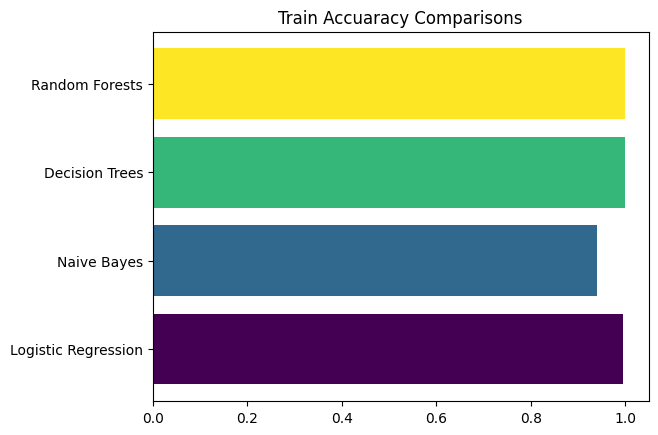

In [110]:

plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore],
        color = colors)

plt.title("Train Accuaracy Comparisons")

print(f'Logistic Regression Train Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Train Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Train Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Train Accuracy score is : {round(rfScore * 100 , 2)}%')